In [4]:
bytes(1)
async(22)

SyntaxError: invalid syntax (<ipython-input-4-bc4343fc2990>, line 2)

In [3]:
import shap
import numpy as np
import pandas as pd
from sklearn import datasets

In [4]:
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)

In [5]:
pd.Series(np.linalg.inv(X.corr()).diagonal(), index = X.columns).sort_values(ascending=False)

mean radius                3806.115296
mean perimeter             3786.400419
worst radius                799.105946
worst perimeter             405.023336
mean area                   347.878657
worst area                  337.221924
radius error                 75.462027
mean concavity               70.767720
perimeter error              70.359695
mean concave points          60.041733
mean compactness             50.505168
area error                   41.163091
worst compactness            36.982755
worst concave points         36.763714
worst concavity              31.970723
worst fractal dimension      18.861533
worst texture                18.569966
mean fractal dimension       15.756977
concavity error              15.694833
compactness error            15.366324
mean texture                 11.884048
concave points error         11.520796
worst smoothness             10.923061
fractal dimension error       9.717987
worst symmetry                9.520570
mean smoothness          

In [6]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

data = lgb.Dataset(X_train, y_train)
test = lgb.Dataset(X_test, y_test)

params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "early_stopping_rounds": 100,
    "learning_rate": 0.01,
    "random_state": 42,
    "n_estimators": 10000
}

gbm = lgb.train(params, train_set=  data, valid_sets= test)

Found `n_estimators` in params. Will use it instead of argument
Found `early_stopping_rounds` in params. Will use it instead of argument


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.654923
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.647205
[LightGBM] [Warning] No further splits with positive gain, be

In [12]:
y_hat = gbm.predict(X_test)

In [13]:
import scipy.stats as stats

stats.chisquare(y_hat, y_test)

divide by zero encountered in true_divide


Power_divergenceResult(statistic=inf, pvalue=0.0)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


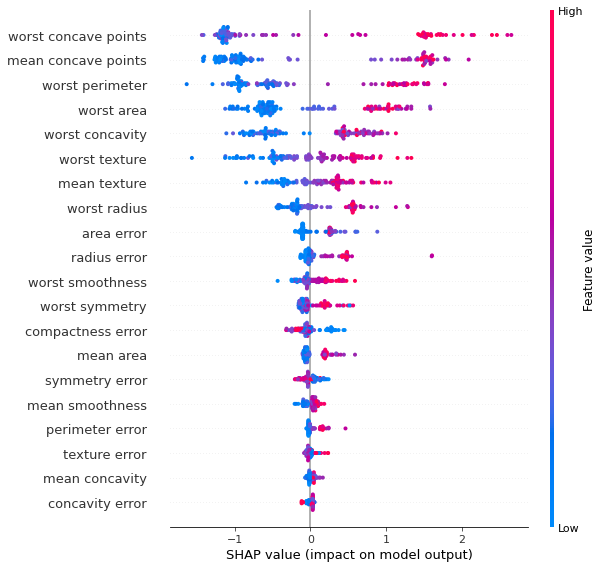

In [7]:
shap_values = shap.TreeExplainer(gbm).shap_values(X_test)
shap.summary_plot(shap_values = shap_values[0],
                  features = X_test,
                  feature_names= X_train.columns,
                  show=False)

In [40]:
shap.dependence_plot("mean concavity", shap_values = np.array(shap_values), features = X_test)

IndexError: index 6 is out of bounds for axis 1 with size 1